# Spectral Feature Extraction

In [1]:
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import sklearn                     # a machine learning library
import os                          # for accessing local files
import IPython.display as ipd
import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import librosa

In [2]:
df = pd.DataFrame(columns = ['Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Rolloff','Spectral_Flux'])
df

,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Spectral_Flux


In [3]:
BASE_FOLDER = "../Audio Data"
sound_file = "adish_alap_aroh_b1.wav"

In [4]:
ipd.Audio(os.path.join(BASE_FOLDER, sound_file))

In [5]:
# load sounds
y, sr = librosa.load(os.path.join(BASE_FOLDER, sound_file))

In [6]:
voice, _ = librosa.effects.trim(y)

In [7]:
def limitFreq(freq,size):
    for i,j in enumerate(freq):
        if j>size:
            return i
            break


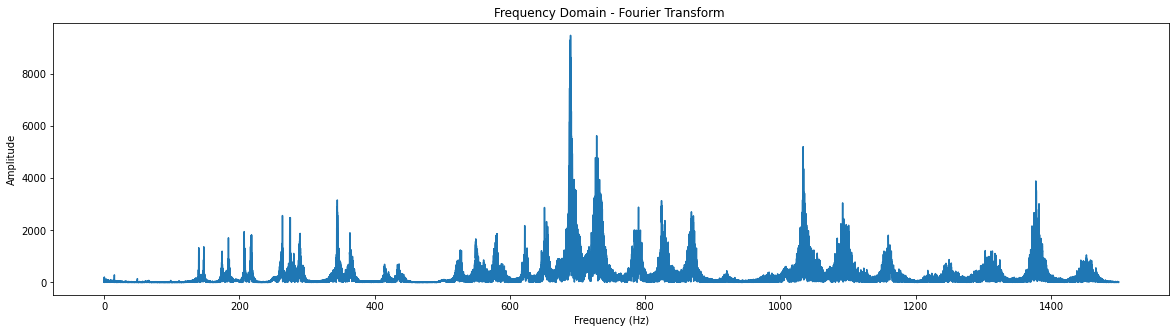

In [8]:
X = np.fft.fft(voice)
X_mag = np.absolute(X)
f = np.linspace(0, sr, len(X_mag))
f_bins=limitFreq(f,1500)

plt.figure(figsize=(20,5))
plt.plot(f[1:f_bins], X_mag[1:f_bins])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain - Fourier Transform ')
plt.show() 

In [9]:
frame_length = 1024
hop_length = 512
features = []

## 1. Spectral centroid

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(voice, sr=sr, n_fft=frame_length, hop_length=hop_length)[0]

In [11]:
spectral_centroids.shape

(2724,)

In [12]:
mean_spectral_centroids = np.mean(spectral_centroids)
print(mean_spectral_centroids)

988.0861265501853


In [13]:
features.append(mean_spectral_centroids)

### Visualizing spectral centroid

In [14]:
frames = range(len(spectral_centroids))
f_times = librosa.frames_to_time(frames, hop_length=hop_length)

In [15]:
# normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

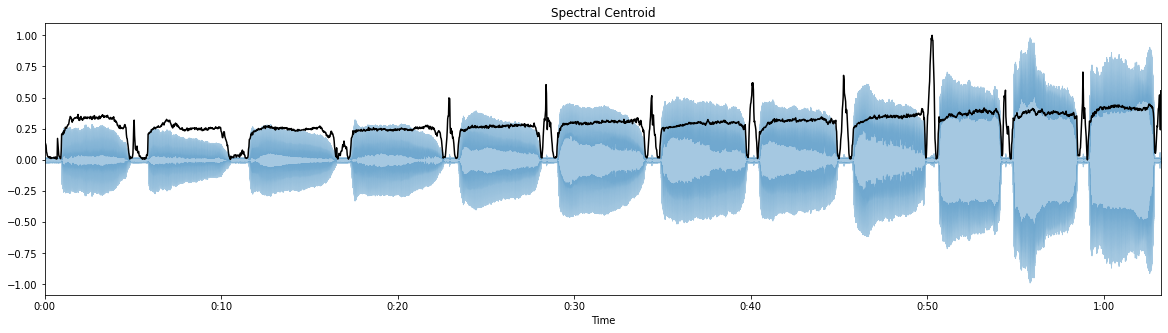

In [16]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(voice, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_centroids), color='black', label='spectral centroids')
plt.xlabel('Time')
plt.title("Spectral Centroid")
plt.show()

## 2. Spectral bandwidth

In [17]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(voice, sr = sr, n_fft=frame_length, hop_length=hop_length)[0]

In [18]:
spectral_bandwidth.shape

(2724,)

In [19]:
mean_spectral_bandwidth = np.mean(spectral_bandwidth)
print(mean_spectral_bandwidth)

1134.5195509747482


In [20]:
features.append(mean_spectral_bandwidth)

### Visualizing spectral bandwidth

In [21]:
frames = range(len(spectral_bandwidth))
f_times = librosa.frames_to_time(frames, hop_length=hop_length)

In [22]:
# normalize the spectral bandwidth for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

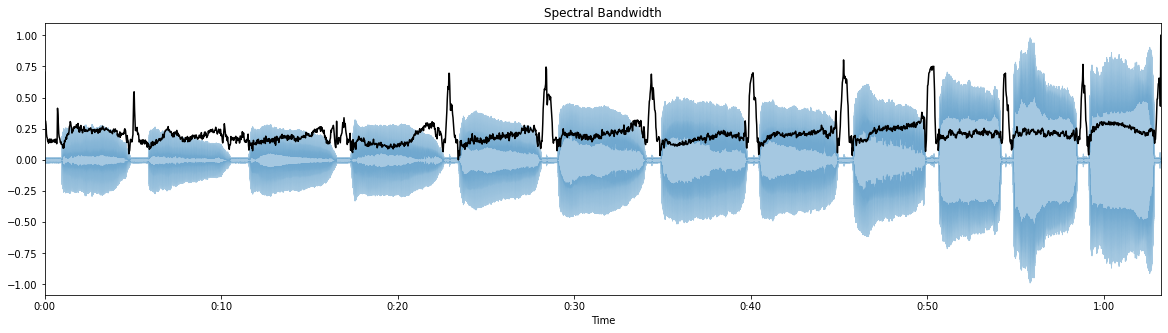

In [23]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(voice, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_bandwidth), color='black', label='spectral bandwidth')
plt.xlabel('Time')
plt.title("Spectral Bandwidth")
plt.show()

## 3. Spectral Rolloff

In [24]:
spectral_rolloff = librosa.feature.spectral_rolloff(voice, sr = sr, n_fft=frame_length, hop_length=hop_length)[0]

In [25]:
spectral_rolloff.shape

(2724,)

In [26]:
mean_spectral_rolloff = np.mean(spectral_rolloff)
print(mean_spectral_rolloff)

1475.5145236784142


In [27]:
features.append(mean_spectral_rolloff)

### Visualizing spectral rolloff

In [28]:
frames = range(len(spectral_rolloff))
f_times = librosa.frames_to_time(frames, hop_length=hop_length)

In [29]:
# normalize the spectral rolloff for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

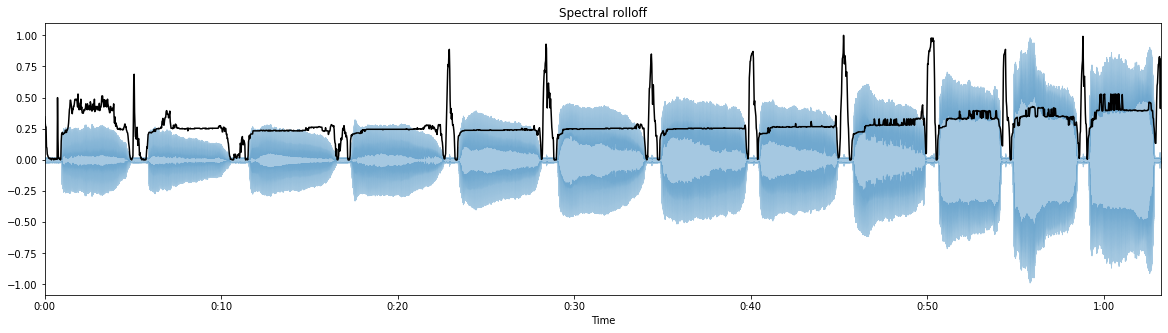

In [30]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(voice, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_rolloff), color='black', label='spectral rolloff')
plt.xlabel('Time')
plt.title("Spectral rolloff")
plt.show()

## 4. Spectral Flux

In [31]:
spectral_flux = librosa.onset.onset_strength(voice, sr=sr)

In [32]:
spectral_flux.shape

(2724,)

In [33]:
mean_spectral_flux = np.mean(spectral_flux)
print(mean_spectral_flux)

0.7884543


In [34]:
features.append(mean_spectral_flux)

### Visualizing spectral flux

In [35]:
frames = range(len(spectral_flux))
f_times = librosa.frames_to_time(frames, hop_length=hop_length)

In [36]:
# normalize the spectral flux for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

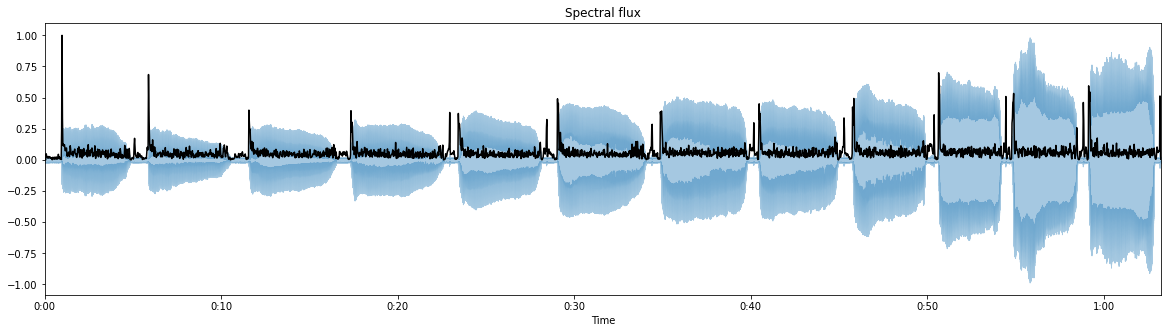

In [37]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(voice, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_flux), color='black', label='spectral flux')
plt.xlabel('Time')
plt.title("Spectral flux")
plt.show()

In [38]:
print(features)

[988.0861265501853, 1134.5195509747482, 1475.5145236784142, 0.7884543]


In [39]:
df.loc[len(df)] = features

In [40]:
df

,Spectral_Centroid,Spectral_Bandwidth,Spectral_Rolloff,Spectral_Flux
0,988.086127,1134.519551,1475.514524,0.788454
